In [2]:
#Necessary imports
# lib for numeric calculations
import numpy as np

# standard lib for python plotting
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# seaborn lib for more option in DS
import seaborn as sns

# so to obtain pseudo-random numbers
import random 
                                     
# fits a curve to data
from scipy.optimize import leastsq #least squares
from scipy.optimize import curve_fit # non linear least squares

import math



/Users/charilaostsarouchas/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Users/charilaostsarouchas/anaconda/lib/python2.7/argparse.pyc, but /Users/charilaostsarouchas/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


### Plot and Fit the Data

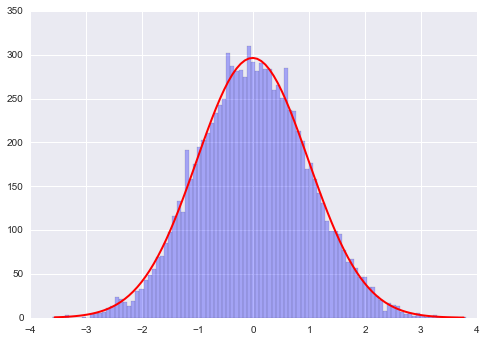

In [3]:
Nbins = 100
def gauss(x, *p):
    """ Gaussian model function"""
    I, mu, sigma = p
    return I * np.exp( - (x - mu) ** 2 / (2. * sigma ** 2))
# Create the data and bin information
data = np.random.normal(0, 1, size=10000)
bin_values, bin_edges = np.histogram(data, density=False, bins=Nbins)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
# assign params
init_coeff = [0., 1., 1.]
# Fit the data
fit_coeff, var_matrix = curve_fit(gauss, bin_centres, bin_values, p0=init_coeff)
#fit_coeff, var_matrix = curve_fit(gauss, bin_centres, bin_values, p0=init_coeff)


hist_fit = gauss(bin_centres, *fit_coeff)
# and visualize
plt.plot(bin_centres, hist_fit, label='Fitted data', color='red', linewidth=2)
hist = plt.hist(data, bins=Nbins, color='blue', alpha=.3)

In [51]:
bin_centres[99]

3.7704377485451674

### See the Fit Residuals

In [70]:
def calc_chisq(data, function, params, _ndf_func=None,  prob=None):
    """
    """
    bin_values, bin_edges = np.histogram(data, density=False, bins=Nbins)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
 
    resHisto = None
    newHname = ''

    #hist->Sumw2();
  
    chisq = 0.0
    nbins = len(bin_values)
  
    entries_counted = 0.;
    ###n_entries = hist->Integral(1,nbins);
    n_entries = 0
    for i in bin_values:
        n_entries += i
    
    first_index = 0
    last_index = 0
    expected = 0.
    observed = 0
    err_sq = 0.
    nbins_post_rebinning = 0
 
    tmps = []
    histo_map = {}
    
    for i in range(nbins):
        first_index = i
        last_index = i
        observed = bin_values[i]
        expected = function(bin_centres[i], *params) 
        ##err_sq = (hist->GetBinError(i))*(hist->GetBinError(i));
        
        #if observed < 6, keep adding bins
        while expected < 6. and i < nbins-1:
            i += 1
            #  assert (i<=nbins)
            last_index = i
            observed += bin_values[i]
            expected += function(bin_centres[i], *params)   
            #err_sq += (hist->GetBinError(i))*(hist->GetBinError(i));

        entries_counted += observed
        
        
        
        # make sure that there are > 6 events in the remaining bins
        if n_entries - entries_counted < 6:
            # finish it up if there are < 6 events remaining
            while i < nbins-1:
                i += 1 
                last_index = i
                observed += bin_values[i]
                #err_sq += (hist->GetBinError(i))*(hist->GetBinError(i));
                expected += function(bin_centres[i], *params)  
                entries_counted +=  bin_values[i]
    
        
    
    
       #temp = (observed - expected) * (observed - expected) / err_sq
        temp = (observed - expected) * (observed - expected) / expected 
        chisq += temp
        
        tmps.append(temp)
        #histo_map[i] = math.sqrt(temp)
        # Set the values in the residual plot
        print first_index, last_index, expected - observed
        for j in range(first_index, last_index+1):
            if (expected - observed) > 0: 
                histo_map[j] = math.sqrt(temp)
            else:
                histo_map[j] = -1.* math.sqrt(temp)

        nbins_post_rebinning +=1 
    

    print "First Index " , first_index , " ,    Last Index " , last_index
    print "(last_index- first_index +1) " , (last_index- first_index +1) 
    print "The number of observed for this bin was ", observed 
    print "The number of expected for this bin was ", expected 
    print "I've counted through bin ", last_index  

    #ndf = nbins_post_rebinning -_ndf_func;
    #prob = TMath::Prob(chisq,ndf); 
    print  "**********************************************************************" 
    print  "**********************************************************************" 
    print  "**********************************************************************" 
    print  "**********************************************************************" 
    print  "The chi sq for this fit is ", chisq
    print  "There were this many bins after rebinning ", nbins_post_rebinning 
    print  "and this many free parameters in the original fit ", _ndf_func  
    print  "So the probability for this fit is ", prob  
    print  "**********************************************************************" 
    print  "**********************************************************************" 
    print  "**********************************************************************" 
    print  "**********************************************************************" 

    return histo_map


"""
  //Considering all the bins
  for (int i=1; i<=nbins; i++){
    first_index = i;
    last_index = i;
    observed = hist->GetBinContent(i);
    err_sq = (hist->GetBinError(i))*(hist->GetBinError(i));
    expected = func->Eval(hist->GetBinCenter(i));    
    //if observed < 6, keep adding bins
    while (expected < 6. && i<nbins){
      i++;
      assert (i<=nbins);
      last_index = i;
      observed += hist->GetBinContent(i);
      err_sq += (hist->GetBinError(i))*(hist->GetBinError(i));
      expected += func->Eval(hist->GetBinCenter(i));    
    }
    entries_counted += observed;

    //make sure that there are < 6 events in the remaining bins
    if(n_entries-entries_counted <6){
      //finish it up if there are < 6 events remaining
      while(i<nbins){
	i++;
	last_index = i;
	observed += hist->GetBinContent(i);
	err_sq += (hist->GetBinError(i))*(hist->GetBinError(i));
	expected += func->Eval(hist->GetBinCenter(i));    
	entries_counted += hist->GetBinContent(i);
      }
    }
  
    cout << "First Index " << first_index << "     Last Index " << last_index << endl;
    cout << "(last_index- first_index +1) " << (last_index- first_index +1) << endl;
    cout << "The number of observed for this bin was " << observed << endl;
    cout << "The number of expected for this bin was " << expected << endl;
    cout << "I've counted through bin " << last_index << endl;

    //    double temp = (observed-expected)*(observed-expected)/err_sq;
    double temp = (observed-expected)*(observed-expected)/expected;
    chisq += temp;
    //Set the values in the residual plot
    for (int j=first_index;j<=last_index;j++){
      if ((expected-observed) > 0) 
	resHisto->SetBinContent(j,TMath::Sqrt(temp));
      else 
	resHisto->SetBinContent(j,-1.*TMath::Sqrt(temp));
    }


    nbins_post_rebinning ++;
  }
  Int_t ndf = nbins_post_rebinning -_ndf_func;
  #prob = TMath::Prob(chisq,ndf); 
  cout << "**********************************************************************" << endl;
  cout << "**********************************************************************" << endl;
  cout << "**********************************************************************" << endl;
  cout << "**********************************************************************" << endl;
  cout << "The chi sq for this fit is " << chisq << endl;
  cout << "There were this many bins after rebinning " << nbins_post_rebinning << endl;
  cout << "and this many free parameters in the original fit " << _ndf_func << endl;
  cout << "So the probability for this fit is " << prob << endl;
  cout << "**********************************************************************" << endl;
  cout << "**********************************************************************" << endl;
  cout << "**********************************************************************" << endl;
  cout << "**********************************************************************" << endl;
 
  resHisto->SetFillColor(4); resHisto->SetFillStyle(1001);
  return resHisto;
"""






'\n  //Considering all the bins\n  for (int i=1; i<=nbins; i++){\n    first_index = i;\n    last_index = i;\n    observed = hist->GetBinContent(i);\n    err_sq = (hist->GetBinError(i))*(hist->GetBinError(i));\n    expected = func->Eval(hist->GetBinCenter(i));    \n    //if observed < 6, keep adding bins\n    while (expected < 6. && i<nbins){\n      i++;\n      assert (i<=nbins);\n      last_index = i;\n      observed += hist->GetBinContent(i);\n      err_sq += (hist->GetBinError(i))*(hist->GetBinError(i));\n      expected += func->Eval(hist->GetBinCenter(i));    \n    }\n    entries_counted += observed;\n\n    //make sure that there are < 6 events in the remaining bins\n    if(n_entries-entries_counted <6){\n      //finish it up if there are < 6 events remaining\n      while(i<nbins){\n\ti++;\n\tlast_index = i;\n\tobserved += hist->GetBinContent(i);\n\terr_sq += (hist->GetBinError(i))*(hist->GetBinError(i));\n\texpected += func->Eval(hist->GetBinCenter(i));    \n\tentries_counted += hi

In [71]:
hist_data = calc_chisq(data, gauss, fit_coeff)

0 5 1.75220944872
1 5 2.20452492326
2 6 4.89534888996
3 6 3.97907432483
4 7 7.8170959462
5 7 6.31744658991
6 8 8.17581212655
7 8 5.77464298617
8 9 4.42994511909
9 10 1.43238353051
10 11 2.83993449357
11 11 2.07631091741
12 12 1.64043161644
13 13 -0.507446276638
14 14 -0.328028162326
15 15 -8.77965733929
16 16 -2.81882721194
17 17 3.59914658548
18 18 11.519286218
19 19 10.9859413525
20 20 4.04161268025
21 21 7.72562107426
22 22 4.0726426924
23 23 5.1111393544
24 24 5.8617226701
25 25 1.33549921695
26 26 8.53245203761
27 27 4.43992030738
28 28 2.03124365654
29 29 -4.73536018856
30 30 -9.91761649988
31 31 14.4103506209
32 32 -42.8420156886
33 33 3.21872876815
34 34 -0.529037361202
35 35 -7.22055307556
36 36 -2.0027168153
37 37 2.96835719981
38 38 4.53022204336
39 39 5.51735378789
40 40 6.76469388936
41 41 11.1113757503
42 42 -32.5954799592
43 43 -9.49702508614
44 44 2.28087393072
45 45 6.63088670919
46 46 18.4670451218
47 47 -14.2729589019
48 48 4.37391021643
49 49 14.3970375162
50 50 1.8

<Container object of 100 artists>

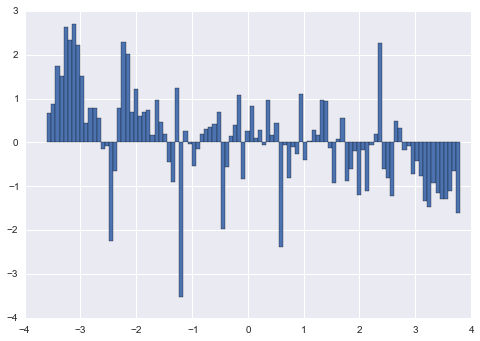

In [69]:
bin_width = bin_edges[1:] - bin_edges[:-1]  
plt.bar(bin_edges[:-1], hist_data.values(), width=bin_width) 

In [26]:
#plt.plot(bin_centres, hist_fit, label='Fitted data', color='red', linewidth=2)
#hist = plt.hist(data, bins=Nbins, color='blue', alpha=.3)
hist_data = calc_chisq(hist, gauss, fit_coeff)

0 5
1 5
2 6
3 6
4 7
5 7
6 8
7 8
8 9
9 10
10 11
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83


IndexError: index 100 is out of bounds for axis 0 with size 100

In [27]:
hist_data

{0: 0.6743153799041263,
 1: 0.8850356124611929,
 2: 1.7421999073312329,
 3: 1.506201721556627,
 4: 2.632586555865332,
 5: 2.3354028094293606,
 6: 2.699035810357099,
 7: 2.2186149374262336,
 8: 1.5257591120662393,
 9: 0.44347337031873224,
 10: 0.792550453140586,
 86: 0.6307537629067244,
 87: 0.3755813185373557,
 88: -0.20610620088146198,
 89: 0.7505478830180632,
 90: -0.13557185374745878,
 91: -1.0169405812701708,
 92: -1.4705409063845858,
 93: -0.9314812833689043,
 94: -1.159740856516764,
 95: -1.288160350353138,
 96: -1.288443670549807,
 97: -1.1096634811131059,
 98: -0.6410036724940109}

In [28]:
bin_width = bin_edges[1:] - bin_edges[:-1]  
len(histo_map.values())

26

AssertionError: incompatible sizes: argument 'height' must be length 101 or scalar

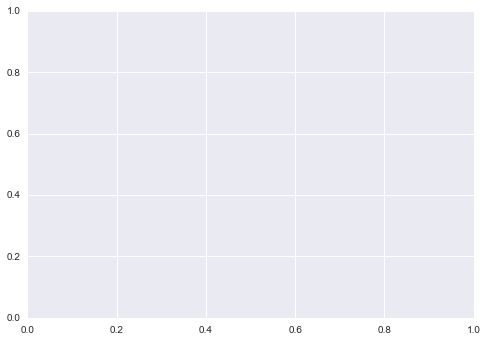

In [30]:
hist_data.values()
bin_width = bin_edges[1:] - bin_edges[:-1]  
plt.bar(bin_edges, hist_data.values(), width=bin_width) 

